In [24]:
#setting up datasets and directories

import zipfile
import os

root_path = 'data/'
classes = [i[:len(i)-10] for i in [x for x in os.walk(root_path)][0][2][0:]]
print(classes)

['transcription-factor', 'inflammation-signalling', 'neurodegenerative', 'alzheimer']


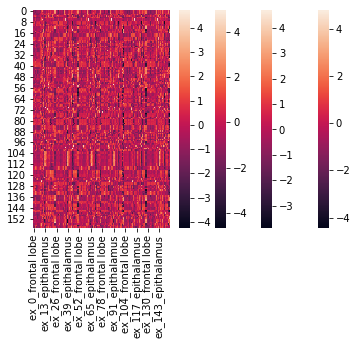

In [25]:
#formatting expression data
import seaborn as sns

import csv
import pandas

col_names = [f'ex_{i}' for i in range(0, 157)]
alzheimer_columns = pandas.read_csv('data/alzheimer/Columns.csv')
alzheimer_expression = pandas.read_csv('data/alzheimer/Expression.csv', names=col_names)

def heatmap(name):
    import csv
    import pandas as pd
    import numpy as np
    from pandas import DataFrame
    import seaborn as sns
    import random
    from sklearn import preprocessing
    hard_exp = pd.read_csv('data/' + name + '/Expression.csv')
    df_columns = pd.read_csv('data/' + name + '/Columns.csv')
    col_names = col_names = ["ex_" + str(i) + "_" + str(j) for i, j in enumerate(df_columns["structure_name"])]
    size = hard_exp.shape
    initial_col_names = ["ex_" + str(i) for i in range(0, size[1])]
    df_expression = pd.read_csv('data/' + name + '/Expression.csv', names=initial_col_names)
    original_df_expression = df_expression.copy()
    df_expression = df_expression.drop("ex_0", axis=1)
    df_expression.columns = col_names
    sns.heatmap(df_expression)
    return df_expression, df_columns, original_df_expression
                         
inflammation_signalling_expression, inflammation_signalling_columns, original_inflammation_signalling = heatmap("inflammation-signalling")
alzheimer_expression, alzheimer_columns, original_alzheimer_signalling = heatmap("alzheimer")
transcription_factor_expression, transcription_factor_columns, original_transcription_factor_signalling = heatmap("transcription-factor")
neurodegenerative_expression, neurodegenerative_columns, original_neurodegenerative_signalling = heatmap("neurodegenerative")


['dorsal thalamus', 'cerebellar nuclei', 'sulci & spaces', 'basal forebrain', 'ventral thalamus', 'mesencephalon', 'parahippocampal gyrus', 'insula', 'striatum', 'temporal lobe', 'cerebellar cortex', 'amygdala', 'epithalamus', 'myelencephalon', 'globus pallidus', 'hypothalamus', 'frontal lobe', 'basal part of pons', 'pontine tegmentum', 'white matter', 'subthalamus', 'claustrum', 'occipital lobe', 'parietal lobe', 'hippocampal formation', 'cingulate gyrus']


<AxesSubplot:>

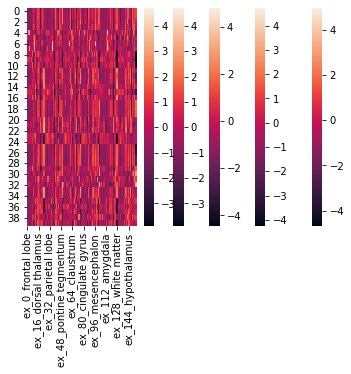

In [26]:
brain_regions = list(set(alzheimer_columns["structure_name"]))
print(brain_regions)
transcription_factor_heatmap = sns.heatmap(transcription_factor_expression)
neurodegenerative_heatmap = sns.heatmap(neurodegenerative_expression)
inflammation_signalling_heatmap = sns.heatmap(inflammation_signalling_expression)
alzheimer_heatmap = sns.heatmap(alzheimer_expression)
sns.heatmap(alzheimer_expression)

In [27]:
alzheimer_expression.head()
alzheimer_expression.shape

(40, 156)

In [9]:
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.svm import LinearSVC

# !pip uninstall umap -y
# !pip install umap-learn
# import umap.umap_ as umap

In [10]:
# !pip install pymrmre
# import pandas as pd
# from pymrmre import mrmr

# test_data = 
# test_labels = alzheimer_expression['ex_1']

# solutions = mrmr.mrmr_ensemble(features=X,targets=Y,fixed_features=['f1'],category_features=['f4','f5'],solution_length=5,solution_count=3)

In [28]:
from sklearn.manifold import TSNE
# from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  
import numpy as np

In [14]:
# tsne = TSNE(n_components=2, verbose=1, random_state=123)
# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(axis = 1, inplace=True)
# #     print(df.shape)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)
# alzheimer_expression2 = clean_dataset(alzheimer_expression)
# alzheimer_expression2 = abs(round(alzheimer_expression2))
# alzheimer_expression2 = alzheimer_expression2.transpose()
# alzheimer_expression2.drop(alzheimer_expression2.columns[10], axis=1)
# z = tsne.fit_transform(alzheimer_expression2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 152 samples in 0.000s...
[t-SNE] Computed neighbors for 152 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 152 / 152
[t-SNE] Mean sigma: 1.846168
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.929249
[t-SNE] KL divergence after 1000 iterations: 0.591215


In [38]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(axis = 1, inplace=True)
#     print(df.shape)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
neurodegenerative_expression2 = clean_dataset(neurodegenerative_expression)
neurodegenerative_expression2 = abs(round(neurodegenerative_expression2, 0))
neurodegenerative_expression2 = neurodegenerative_expression2.transpose()
neurodegenerative_expression2.drop(neurodegenerative_expression2.columns[10], axis=1)
z = tsne.fit_transform(neurodegenerative_expression2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 152 samples in 0.000s...
[t-SNE] Computed neighbors for 152 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 152 / 152
[t-SNE] Mean sigma: 3.356872
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.654102
[t-SNE] KL divergence after 1000 iterations: 0.468772


In [43]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(axis = 1, inplace=True)
#     print(df.shape)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
inflammation_signalling_expression2 = clean_dataset(inflammation_signalling_expression)
inflammation_signalling_expression2 = abs(round(inflammation_signalling_expression2, 0))
inflammation_signalling_expression2 = inflammation_signalling_expression2.transpose()
inflammation_signalling_expression2.drop(inflammation_signalling_expression2.columns[10], axis=1)
z = tsne.fit_transform(inflammation_signalling_expression2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 152 samples in 0.002s...
[t-SNE] Computed neighbors for 152 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 152 / 152
[t-SNE] Mean sigma: 5.774421
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.338715
[t-SNE] KL divergence after 1000 iterations: 0.507065


In [44]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(axis = 1, inplace=True)
#     print(df.shape)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
transcription_factor_expression2 = clean_dataset(transcription_factor_expression)
transcription_factor_expression2 = abs(round(transcription_factor_expression2, 0))
transcription_factor_expression2 = transcription_factor_expression2.transpose()
transcription_factor_expression2.drop(transcription_factor_expression2.columns[10], axis=1)
z = tsne.fit_transform(transcription_factor_expression2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 152 samples in 0.000s...
[t-SNE] Computed neighbors for 152 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 152 / 152
[t-SNE] Mean sigma: 10.808292
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.270126
[t-SNE] KL divergence after 1000 iterations: 0.420973


[Text(0.5, 1.0, "Genomic data T-SNE projection (Alzheimer's)")]

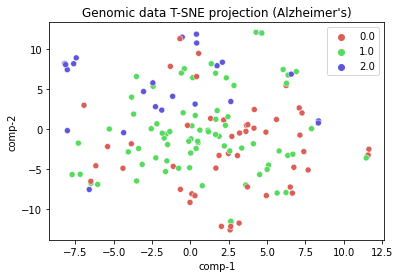

In [50]:
df = pd.DataFrame()
df["y"] = alzheimer_expression2[alzheimer_expression2.columns[0]]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Genomic data T-SNE projection (Alzheimer's)") 

[Text(0.5, 1.0, 'Genomic data T-SNE projection (Neurodegenerative)')]

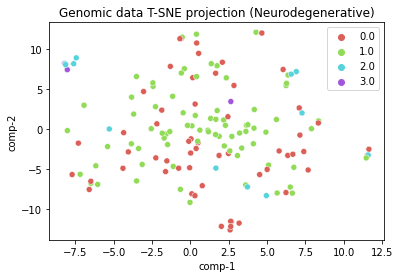

In [49]:
df = pd.DataFrame()
df["y"] = neurodegenerative_expression2[neurodegenerative_expression2.columns[10]]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", len(set(df.y.tolist()))),
                data=df).set(title="Genomic data T-SNE projection (Neurodegenerative)") 

[Text(0.5, 1.0, 'Genomic data T-SNE projection (Transcription)')]

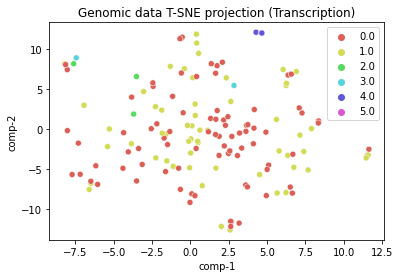

In [48]:
df = pd.DataFrame()
df["y"] = transcription_factor_expression2[transcription_factor_expression2.columns[10]]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", len(set(df.y.tolist()))),
                data=df).set(title="Genomic data T-SNE projection (Transcription)") 